# Test Single File Labels

In [13]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import os

def construct_paths(dataset, sub_folder, number):
    # Construct the paths dynamically
    if debug_mode is False:
        base_path = r"C:\Users\sakar\OneDrive\mt-datas\synthetic_data"
        image_path = os.path.join(base_path, f"{dataset}", "images", sub_folder, f"{number}.png")
        label_path = os.path.join(base_path, f"{dataset}", "labels", sub_folder, f"{number}.txt")
    else:
        base_path = r"C:\Users\sakar\OneDrive\mt-datas\synth_validation_data"
        image_path = os.path.join(base_path, f"{dataset}", f"{dataset}_{number}_pic.png")
        label_path = os.path.join(base_path, f"{dataset}", f"{dataset}_{number}_coco.txt")
    
    return image_path, label_path

def process_image(dataset, sub_folder, number):
    image_path, label_path = construct_paths(dataset, sub_folder, number)
    
    # Load and display the image
    if os.path.exists(image_path):
        img = Image.open(image_path)
        width, height = img.size
        print(f"Image dimensions: {width}x{height}")
    else:
        raise FileNotFoundError(f"Image file not found at {image_path}")

    # Check if the label file is empty before reading
    if os.path.exists(label_path) and os.path.getsize(label_path) > 0:
        df = pd.read_csv(label_path, delimiter=' ', header=None)
        
    else:
        print("Label file is empty or not found. No bounding boxes to display.")
        return

    # Create a drawing context on the image
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()

    # Loop through each row in the DataFrame to get bounding box and corner details
    for index, row in df.iterrows():
        center_x = row[1] * width
        center_y = row[2] * height
        bbox_width = row[3] * width
        bbox_height = row[4] * height

        top_left_x = center_x - (bbox_width / 2)
        top_left_y = center_y - (bbox_height / 2)
        bottom_right_x = center_x + (bbox_width / 2)
        bottom_right_y = center_y + (bbox_height / 2)

        draw.rectangle([top_left_x, top_left_y, bottom_right_x, bottom_right_y], outline="red", width=2)
        draw.ellipse([center_x - 3, center_y - 3, center_x + 3, center_y + 3], fill="red", outline="red")

        corner_points = [(row[i] * width, row[i + 1] * height) for i in range(5, 28, 3)]

        for i, point in enumerate(corner_points):
            x, y = point
            text = str(i)
            bbox = draw.textbbox((x, y), text, font=font)
            text_width = bbox[2] - bbox[0]
            text_height = bbox[3] - bbox[1]

            draw.rectangle([x, y, x + text_width + 6, y + text_height + 4], fill="blue")
            draw.text((x + 3, y + 2), text, fill="white", font=font)

        top_square = corner_points[:4]
        bottom_square = corner_points[4:]

        for i in range(4):
            draw.line([top_square[i], top_square[(i + 1) % 4]], fill="green", width=2)
            draw.line([bottom_square[i], bottom_square[(i + 1) % 4]], fill="green", width=2)
            draw.line([top_square[i], bottom_square[i]], fill="green", width=2)

    img.show()

debug_mode = False
dataset = "12_yoro_dataset"
sub_dir = "test"
number = "10051"
process_image(dataset, sub_dir, number)


Image dimensions: 1280x720


# Distribution

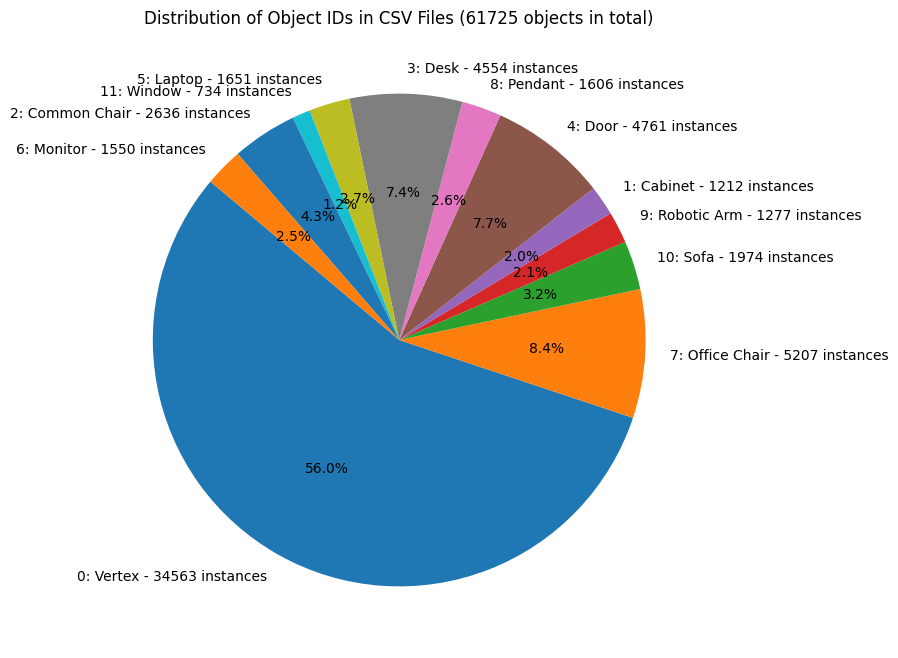

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory containing the CSV files
directory_path = r'C:\Users\sakar\OneDrive\mt-datas\synthetic_data\12_yoro_dataset\2d_data'

# Initialize a dictionary to count occurrences of each ID
id_counts = {}

# Mapping of ID to object names
id_to_name = {
    0: "Vertex",
    1: "Cabinet",
    2: "Common Chair",
    3: "Desk",
    4: "Door",
    5: "Laptop",
    6: "Monitor",
    7: "Office Chair",
    8: "Pendant",
    9: "Robotic Arm",
    10: "Sofa",
    11: "Window",
    -1: "Unlabeled / Mistake"
}

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        
        # Read the CSV file, skip if empty
        try:
            data = pd.read_csv(file_path)
            if data.empty:
                continue  # Skip if the CSV is empty
        except pd.errors.EmptyDataError:
            continue  # Skip if file is empty or has no data

        # Count occurrences of each ID in the 0th column
        for id_value in data.iloc[:, 0]:
            if id_value in id_counts:
                id_counts[id_value] += 1
            else:
                id_counts[id_value] = 1

# Calculate the total number of objects
total_objects = sum(id_counts.values())

# Create labels for each ID with the format: "ID: Name - X instances"
labels = [
    f"{id_value}: {id_to_name.get(id_value, 'Unknown')} - {count} instances"
    for id_value, count in id_counts.items()
]

# Plot a pie chart of the ID counts with the custom labels
plt.figure(figsize=(10, 8))
plt.pie(id_counts.values(), labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Object IDs in CSV Files ({total_objects} objects in total)')
plt.show()


# Distribution without IDs

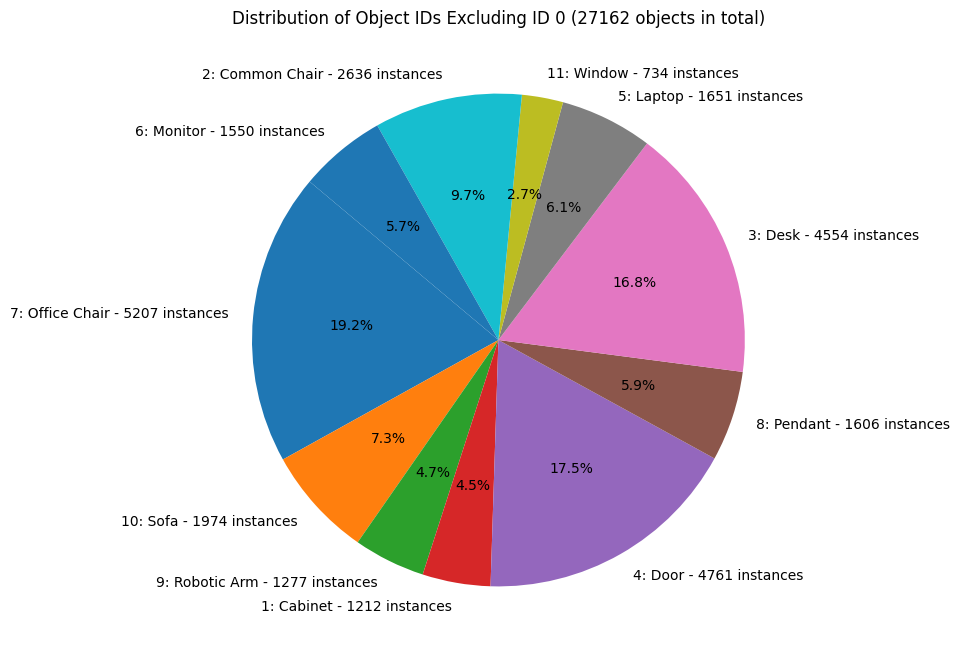

In [2]:
# Exclude ID 0 for the second plot
filtered_id_counts = {id_value: count for id_value, count in id_counts.items() if id_value != 0}
filtered_total_objects = sum(filtered_id_counts.values())

# Create labels for the filtered IDs
filtered_labels = [
    f"{id_value}: {id_to_name.get(id_value, 'Unknown')} - {count} instances"
    for id_value, count in filtered_id_counts.items()
]

# Plot the second pie chart excluding ID 0
plt.figure(figsize=(10, 8))
plt.pie(filtered_id_counts.values(), labels=filtered_labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Object IDs Excluding ID 0 ({filtered_total_objects} objects in total)')
plt.show()